In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Input, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import numpy as np
train, test = mnist.load_data()
X_train, y_train = train[0], train[1]
X_test, y_test = test[0], test[1]

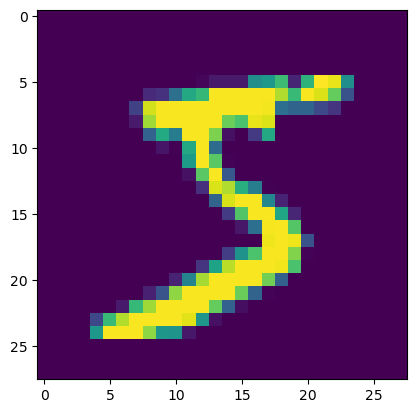

In [3]:
np.shape(X_train)
plt.imshow(X_train[0])

In [39]:
model = Sequential()

In [40]:
model.add(Dense(64, activation="relu", input_shape=(X_train.shape[1]**2,)))

In [41]:
model.add(Dense(32, activation="sigmoid"))

In [42]:
model.add(Dense(32, activation="tanh"))

In [43]:
model.add(Dense(10, activation="softmax"))

In [99]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics="accuracy")

In [93]:
X_test = X_test.reshape(X_test.shape[0],-1)
X_train = X_train.reshape(X_train.shape[0],-1)

In [94]:
y_test = pd.get_dummies(y_test).values
y_train = pd.get_dummies(y_train).values

In [95]:
X_test = X_test/255
X_train = X_train/255

In [100]:
history = model.fit(X_train, y_train, batch_size=32, epochs=2500, validation_data=(X_test, y_test), verbose=2)

Epoch 1/2500
1875/1875 - 4s - loss: 1.1448 - accuracy: 0.7407 - val_loss: 0.5667 - val_accuracy: 0.8829 - 4s/epoch - 2ms/step
Epoch 2/2500
1875/1875 - 3s - loss: 0.4318 - accuracy: 0.8981 - val_loss: 0.3315 - val_accuracy: 0.9143 - 3s/epoch - 1ms/step
Epoch 3/2500
1875/1875 - 3s - loss: 0.2966 - accuracy: 0.9194 - val_loss: 0.2589 - val_accuracy: 0.9288 - 3s/epoch - 1ms/step
Epoch 4/2500
1875/1875 - 3s - loss: 0.2419 - accuracy: 0.9312 - val_loss: 0.2216 - val_accuracy: 0.9379 - 3s/epoch - 1ms/step
Epoch 5/2500
1875/1875 - 3s - loss: 0.2092 - accuracy: 0.9398 - val_loss: 0.1977 - val_accuracy: 0.9418 - 3s/epoch - 1ms/step
Epoch 6/2500
1875/1875 - 3s - loss: 0.1860 - accuracy: 0.9468 - val_loss: 0.1809 - val_accuracy: 0.9463 - 3s/epoch - 1ms/step
Epoch 7/2500
1875/1875 - 3s - loss: 0.1672 - accuracy: 0.9518 - val_loss: 0.1668 - val_accuracy: 0.9506 - 3s/epoch - 2ms/step
Epoch 8/2500
1875/1875 - 3s - loss: 0.1523 - accuracy: 0.9559 - val_loss: 0.1544 - val_accuracy: 0.9536 - 3s/epoch - 2

In [105]:
history.history

{'loss': [1.144775629043579,
  0.4317847788333893,
  0.29663681983947754,
  0.24189378321170807,
  0.20917873084545135,
  0.18596427142620087,
  0.16724079847335815,
  0.15231315791606903,
  0.13948409259319305,
  0.12893176078796387,
  0.11943438649177551,
  0.11147494614124298,
  0.10423294454813004,
  0.09789595007896423,
  0.09225131571292877,
  0.08689180016517639,
  0.08218181878328323,
  0.07809286564588547,
  0.0736936628818512,
  0.07048571854829788,
  0.06726270169019699,
  0.06390109658241272,
  0.06116630882024765,
  0.05804363265633583,
  0.055552881211042404,
  0.05292710289359093,
  0.05078534781932831,
  0.04842362552881241,
  0.04627339541912079,
  0.044196583330631256,
  0.04222380369901657,
  0.040286291390657425,
  0.038650091737508774,
  0.03685378283262253,
  0.03532242029905319,
  0.033812545239925385,
  0.03224274516105652,
  0.030906572937965393,
  0.029297029599547386,
  0.027963999658823013,
  0.026790644973516464,
  0.025514723733067513,
  0.0241919681429862

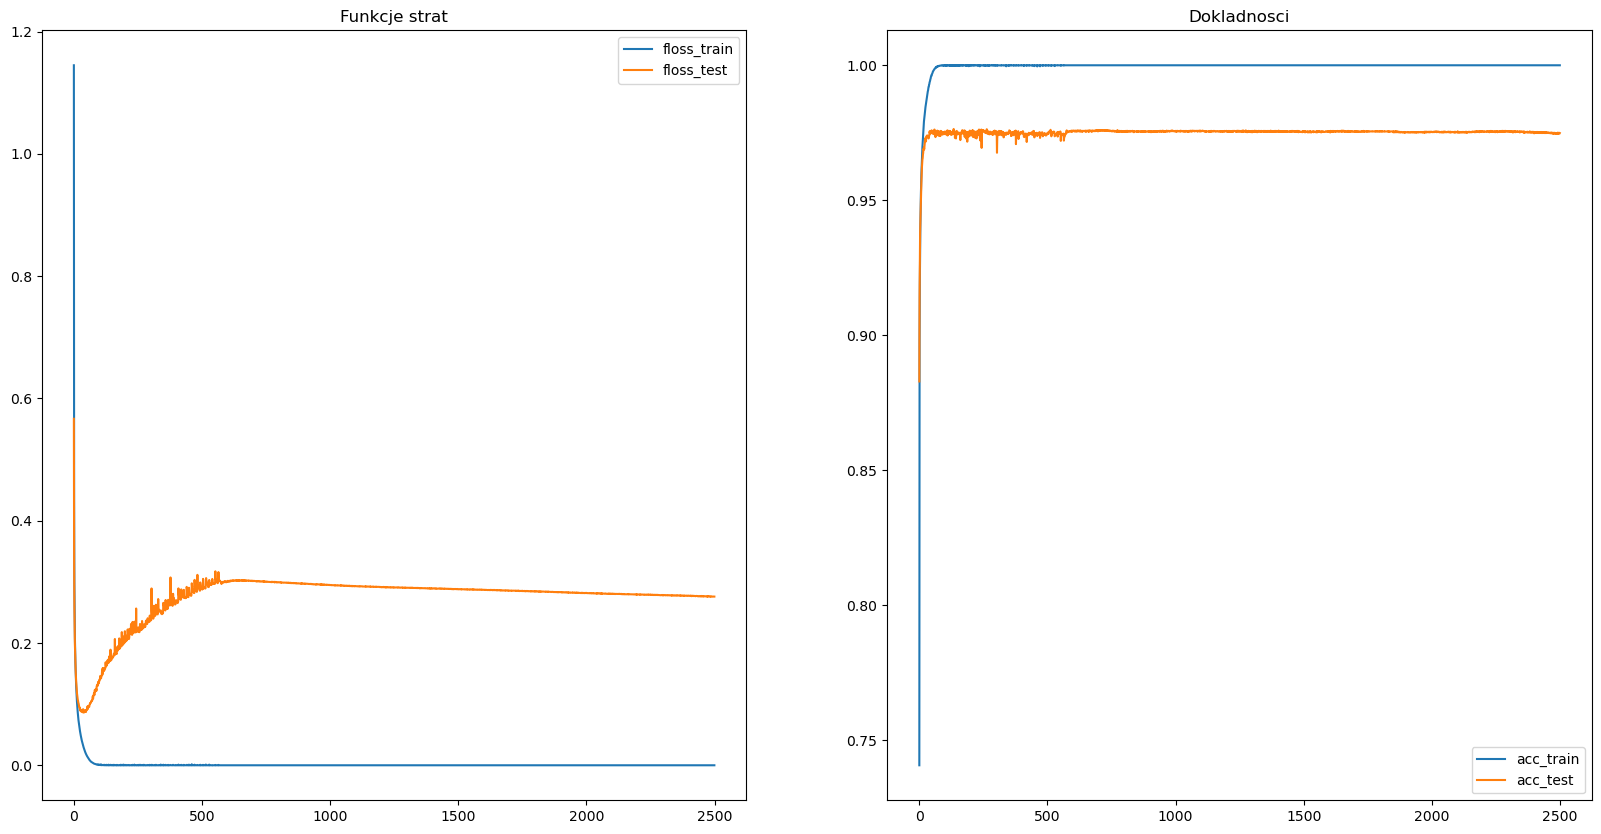

In [107]:
historia = model.history.history
floss_train = historia['loss']
floss_test = historia['val_loss']
acc_train = historia['accuracy']
acc_test = historia['val_accuracy']
fig,ax = plt.subplots(1,2, figsize=(20,10))
epochs = np.arange(0, 2500)
ax[0].plot(epochs, floss_train, label = 'floss_train')
ax[0].plot(epochs, floss_test, label = 'floss_test')
ax[0].set_title('Funkcje strat')
ax[0].legend()
ax[1].set_title('Dokladnosci')
ax[1].plot(epochs, acc_train, label = 'acc_train')
ax[1].plot(epochs, acc_test, label = 'acc_test')
ax[1].legend()

KONWOLUCJA

In [8]:
model = Sequential(
    [
        Input(shape=(28, 28, 1)),
        Conv2D(32, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(10, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 10)                1

In [9]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics="accuracy")

In [11]:
y_test = pd.get_dummies(y_test).values
y_train = pd.get_dummies(y_train).values

In [13]:
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [16]:
X_test = X_test/255
X_train = X_train/255

In [18]:
history_conv = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), verbose=2)

Epoch 1/50
1875/1875 - 30s - loss: 0.0777 - accuracy: 0.9768 - val_loss: 0.0668 - val_accuracy: 0.9784 - 30s/epoch - 16ms/step
Epoch 2/50
1875/1875 - 30s - loss: 0.0688 - accuracy: 0.9791 - val_loss: 0.0558 - val_accuracy: 0.9824 - 30s/epoch - 16ms/step
Epoch 3/50
1875/1875 - 30s - loss: 0.0620 - accuracy: 0.9815 - val_loss: 0.0516 - val_accuracy: 0.9836 - 30s/epoch - 16ms/step
Epoch 4/50
1875/1875 - 30s - loss: 0.0571 - accuracy: 0.9829 - val_loss: 0.0582 - val_accuracy: 0.9823 - 30s/epoch - 16ms/step
Epoch 5/50
1875/1875 - 30s - loss: 0.0526 - accuracy: 0.9844 - val_loss: 0.0490 - val_accuracy: 0.9836 - 30s/epoch - 16ms/step
Epoch 6/50
1875/1875 - 28s - loss: 0.0491 - accuracy: 0.9847 - val_loss: 0.0509 - val_accuracy: 0.9836 - 28s/epoch - 15ms/step
Epoch 7/50
1875/1875 - 27s - loss: 0.0461 - accuracy: 0.9859 - val_loss: 0.0428 - val_accuracy: 0.9857 - 27s/epoch - 14ms/step
Epoch 8/50
1875/1875 - 27s - loss: 0.0437 - accuracy: 0.9868 - val_loss: 0.0419 - val_accuracy: 0.9861 - 27s/ep

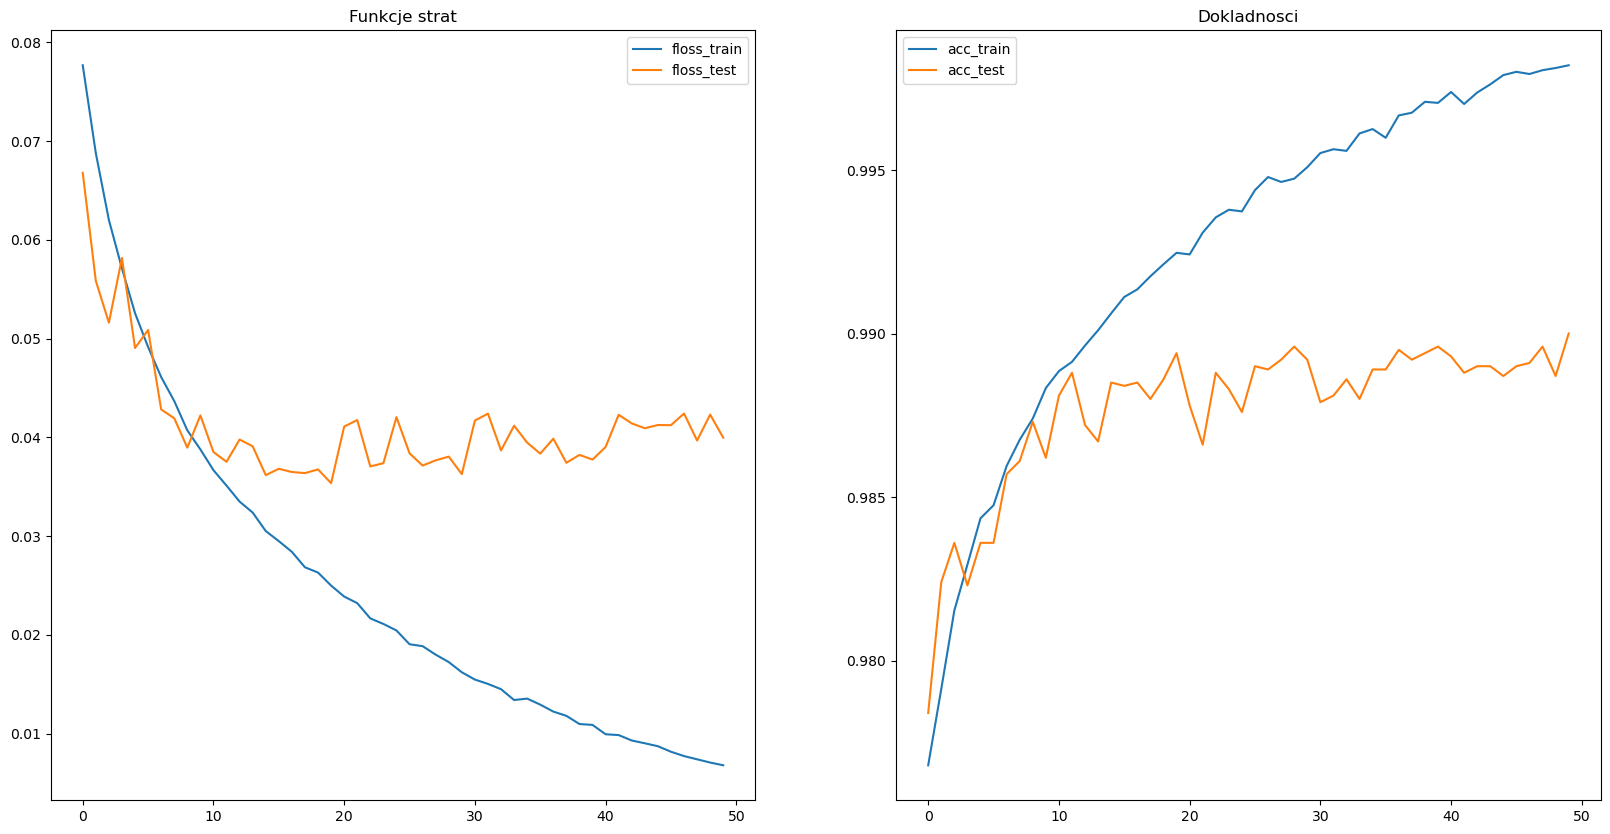

In [22]:
historia1 = history_conv.history
floss_train = historia1['loss']
floss_test = historia1['val_loss']
acc_train = historia1['accuracy']
acc_test = historia1['val_accuracy']
fig,ax = plt.subplots(1,2, figsize=(20,10))
epochs = np.arange(0, 50)
ax[0].plot(epochs, floss_train, label = 'floss_train')
ax[0].plot(epochs, floss_test, label = 'floss_test')
ax[0].set_title('Funkcje strat')
ax[0].legend()
ax[1].set_title('Dokladnosci')
ax[1].plot(epochs, acc_train, label = 'acc_train')
ax[1].plot(epochs, acc_test, label = 'acc_test')
ax[1].legend()